In [82]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score

from sklearn.linear_model import Ridge
import xgboost as xgb
from xgboost import plot_tree
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [28]:
# 한글 폰트 깨짐 방지
import warnings
import platform
from matplotlib import font_manager, rc
## 운영체제별 글꼴 세팅
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")
warnings.simplefilter(action='ignore')

In [6]:
df = pd.read_csv('C:\\Users\SAMSUNG\Desktop\SSAC\머신러닝\메인프로젝트/df_cor15_scale.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
df

,report_sx_남성,report_sx_불상,report_sx_여성,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,5m_crm_yn,theft_violence_x,robber_murder_x,...,single_f_2030,single_f_4050,single_f_o60,adult,bell,q1,q2,q3,q4,q5
0,-0.873690,-0.812504,-1.088919,-0.946182,-1.080025,-0.680192,-0.925678,-0.533681,-0.402208,0.020461,...,-0.971652,-1.708729,-1.550049,-0.593423,-0.593423,75.2,76.5,69.9,65.9,72.6
1,-1.073739,-1.097357,-1.171360,-1.127285,-1.261404,-0.680192,-1.425254,-0.714168,-0.545798,-0.698583,...,-0.877762,-1.629960,-1.502108,0.299434,0.299434,81.6,82.4,69.1,62.7,72.2
2,-1.346245,-1.393118,-1.583148,-1.450459,-1.386409,-0.680192,-1.545335,-0.918154,-0.887971,-1.417626,...,-0.971652,-1.708729,-1.550049,-0.593423,-0.593423,77.3,79.3,68.8,61.0,71.7
3,-0.321555,2.036024,-0.182071,0.065182,-0.589811,-0.680192,-0.581016,-0.037717,-0.090585,-1.417626,...,0.708900,0.029251,0.221012,-0.593423,-0.593423,78.0,80.0,67.0,66.3,71.4
4,-1.155951,-0.917384,-1.274359,-1.178306,-1.240979,-0.680192,-1.395921,-0.739167,-0.845200,0.020461,...,-0.877762,-1.629960,-1.502108,-0.593423,-0.593423,78.6,80.6,70.7,65.2,75.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.958533,-0.916965,-0.835575,-0.933879,-0.968910,-0.032891,-0.419685,-1.100141,-1.040727,-0.698583,...,-0.845594,0.027122,-0.265578,-0.146995,-0.146995,79.1,79.5,68.5,71.2,76.0
242,-1.003147,-1.100714,-0.973045,-1.027990,-1.128230,0.938060,-0.768014,-1.486613,-1.688412,-0.339061,...,-0.957283,-0.853710,0.260147,0.745862,0.745862,80.8,80.0,70.8,73.2,76.5
243,-0.679341,-0.833061,-0.732576,-0.731357,-0.760569,1.909011,-0.469185,-1.211133,-1.196538,0.739504,...,-1.074850,-0.799423,-0.072507,-0.146995,-0.146995,75.0,76.5,69.4,68.9,73.1
244,0.051030,0.036181,0.058191,0.051943,-0.076720,-0.680192,1.052459,-0.733167,-0.509137,-1.417626,...,-0.335158,0.406598,1.772423,2.978006,2.978006,78.7,79.6,70.3,74.6,75.6


In [11]:
q1_co = df.corr().iloc[:,-5]
q1df = pd.DataFrame(q1_co[abs(q1_co) > 0.15])
q1_df = df[q1df.index]
q1_df.drop(['q1','q2','q3','q4','q5'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
q2_co = df.corr().iloc[:, -4]
q2df = pd.DataFrame(q2_co[abs(q2_co) > 0.15])
q2_df = df[q2df.index]
q2_df.drop(['q1','q2','q3','q4','q5'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
q3_co = df.corr().iloc[:, -3]
q3df = pd.DataFrame(q2_co[abs(q3_co) > 0.1])
q3_df = df[q3df.index]
q3_df.drop(['q1','q2','q3','q4','q5'], axis = 1, inplace = True)

In [15]:
q4_co = df.corr().iloc[:, -2]
q4df = pd.DataFrame(q4_co[abs(q4_co) > 0.15])
q4_df = df[q4df.index]
q4_df.drop(['q1','q2','q3','q4','q5'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
q5_co = df.corr().iloc[:, -1]
q5df = pd.DataFrame(q5_co[abs(q5_co) > 0.15])
q5_df = df[q5df.index]
q5_df.drop(['q1','q2','q3','q4','q5'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [98]:
# train_test_split
X_train_q1 = q1_df.iloc[:164,:]
X_test_q1 = q1_df.iloc[164:,:]

X_train_q2 = q2_df.iloc[:164,:]
X_test_q2 = q2_df.iloc[164:,:]

X_train_q3 = q3_df.iloc[:164,:]
X_test_q3 = q3_df.iloc[164:,:]

X_train_q4 = q4_df.iloc[:164,:]
X_test_q4 = q4_df.iloc[164:,:]

X_train_q5 = q5_df.iloc[:164,:]
X_test_q5 = q5_df.iloc[164:,:]

In [25]:
X_train_q1

,report_sx_여성,vio_cnt,theft_violence_x,robber_murder_x,theft_violence_y,robber_murder_y,가해_10대이하,피해_80대이상,for_합계,popu_2030,...,for_2030,for_4050,for_o60,single_합계,single_2030,single_4050,single_o60,single_f_합계,single_f_4050,single_f_o60
0,-1.088919,-1.080025,-0.402208,0.020461,-0.948579,-0.450180,-1.087188,-1.000338,-0.553026,-1.607630,...,-0.715257,-0.444718,-0.389120,-1.382521,-1.007829,-1.645615,-1.541759,-1.408695,-1.708729,-1.550049
1,-1.171360,-1.261404,-0.545798,-0.698583,-1.100422,-0.117615,-1.179444,-0.799618,-0.517983,-1.518672,...,-0.536311,-0.489417,-0.457047,-1.293277,-0.913870,-1.586098,-1.475235,-1.322731,-1.629960,-1.502108
2,-1.583148,-1.386409,-0.887971,-1.417626,-1.013655,-1.447878,-1.363955,-1.401779,-0.553026,-1.607630,...,-0.715257,-0.444718,-0.389120,-1.382521,-1.007829,-1.645615,-1.541759,-1.408695,-1.708729,-1.550049
3,-0.182071,-0.589811,-0.090585,-1.417626,-0.167671,-1.115312,0.204387,0.003264,0.234176,0.366947,...,1.038446,-0.246735,-0.231116,0.330221,0.492436,-0.139220,0.116044,0.542183,0.029251,0.221012
4,-1.274359,-1.240979,-0.845200,0.020461,-1.306495,0.214951,-1.271699,-1.000338,-0.517983,-1.518672,...,-0.536311,-0.489417,-0.457047,-1.293277,-0.913870,-1.586098,-1.475235,-1.322731,-1.629960,-1.502108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,-0.834329,-0.959106,-0.836034,-0.339061,-1.062462,-0.450180,-0.994933,-0.398177,-0.558769,-0.459891,...,-0.537062,-0.461164,-0.548108,-0.516542,-0.711253,0.114513,-0.313426,-0.673211,-0.011731,-0.381355
160,-1.116538,-1.099634,-1.297357,1.818068,-1.203459,0.880083,-1.363955,-0.598897,-0.774821,-1.078337,...,-0.901265,-0.627520,-0.616527,-0.775180,-0.948834,-0.785857,0.091380,-0.754035,-0.785053,0.127086
161,-1.004194,-0.897829,-0.701609,-0.698583,-1.002809,-0.782746,-1.087188,-0.598897,-0.784932,-0.975107,...,-0.936724,-0.620984,-0.598314,-0.869407,-1.040150,-0.634378,-0.171778,-0.888575,-0.710009,-0.217636
162,-0.142616,-0.159240,0.605981,0.739504,0.108900,-0.450180,-0.625912,1.609027,-0.419576,0.065377,...,-0.048453,-0.507760,-0.580594,0.264559,-0.230162,0.363770,1.387936,0.334276,0.445983,1.610987


In [21]:
yy = df.loc[:, ['q1','q2','q3','q4','q5']]
yy

,q1,q2,q3,q4,q5
0,75.2,76.5,69.9,65.9,72.6
1,81.6,82.4,69.1,62.7,72.2
2,77.3,79.3,68.8,61.0,71.7
3,78.0,80.0,67.0,66.3,71.4
4,78.6,80.6,70.7,65.2,75.4
...,...,...,...,...,...
241,79.1,79.5,68.5,71.2,76.0
242,80.8,80.0,70.8,73.2,76.5
243,75.0,76.5,69.4,68.9,73.1
244,78.7,79.6,70.3,74.6,75.6


In [23]:
# y_train, y_test split
y_train_q1 = yy.iloc[:164,0]
y_test_q1 = yy.iloc[164:, 0]

y_train_q2 = yy.iloc[:164,1]
y_test_q2 = yy.iloc[164:, 1]

y_train_q3 = yy.iloc[:164,2]
y_test_q3 = yy.iloc[164:, 2]

y_train_q4 = yy.iloc[:164,3]
y_test_q4 = yy.iloc[164:, 3]

y_train_q5 = yy.iloc[:164,4]
y_test_q5 = yy.iloc[164:, 4]

### q1

In [120]:
a = xgb.XGBRegressor(n_estimators = 100, random_state = 11)

xgb_model = a.fit(X_train_q1, y_train_q1)

pred1 = xgb_model.predict(X_test_q1)

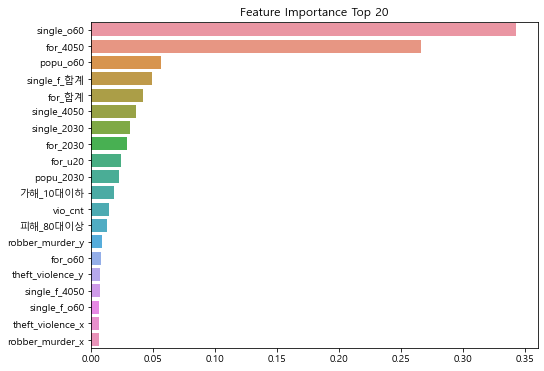

In [121]:

# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q1.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [59]:
X_train_q1.shape, y_train_q1.shape

((164, 22), (164,))

In [79]:
#r_sq = xgb_model.score(X_train_q1, y_train_q1)
#print('r_sq: ', r_sq)
print('score : ', explained_variance_score(pred, y_test_q1))

score :  -0.4949900373805074


In [122]:
mean_absolute_error(y_test_q1, pred1)

2.662630983678305

### q2

In [123]:
# q2
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q2, y_train_q2)

pred2 = xgb_model.predict(X_test_q2)

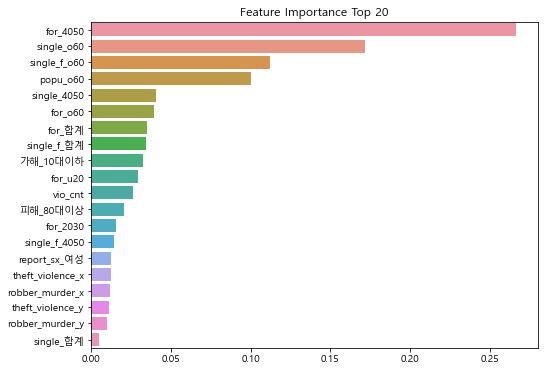

Index(['for_4050', 'single_o60', 'single_f_o60', 'popu_o60', 'single_4050',
       'for_o60', 'for_합계', 'single_f_합계', '가해_10대이하', 'for_u20', 'vio_cnt',
       '피해_80대이상', 'for_2030', 'single_f_4050', 'report_sx_여성',
       'theft_violence_x', 'robber_murder_x', 'theft_violence_y',
       'robber_murder_y', 'single_합계'],
      dtype='object')


In [124]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q2.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [125]:
mean_absolute_error(y_test_q2, pred2)

2.7079713774890433

### q3

In [126]:
# q2
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q3, y_train_q3)

pred3 = xgb_model.predict(X_test_q3)

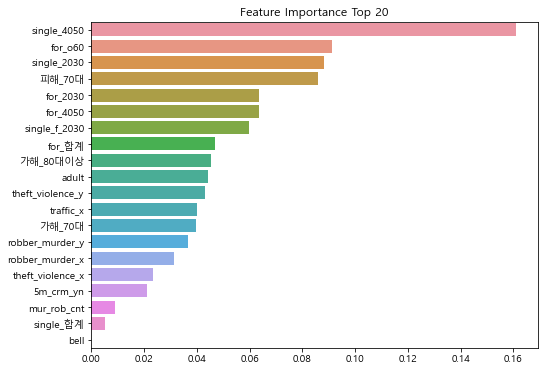

Index(['single_4050', 'for_o60', 'single_2030', '피해_70대', 'for_2030',
       'for_4050', 'single_f_2030', 'for_합계', '가해_80대이상', 'adult',
       'theft_violence_y', 'traffic_x', '가해_70대', 'robber_murder_y',
       'robber_murder_x', 'theft_violence_x', '5m_crm_yn', 'mur_rob_cnt',
       'single_합계', 'bell'],
      dtype='object')


In [127]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q3.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [128]:
mean_absolute_error(y_test_q3, pred3)

2.9204976337711988

### q4

In [129]:
# q4
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q4, y_train_q4)

pred4 = xgb_model.predict(X_test_q4)

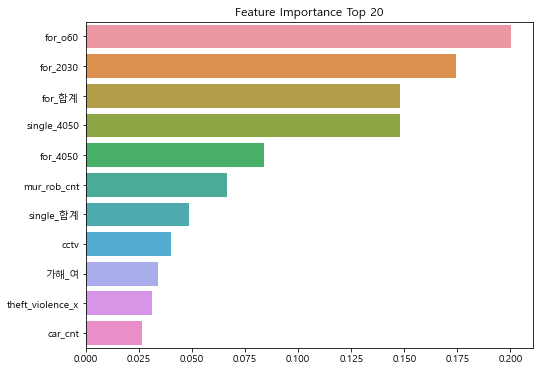

Index(['for_o60', 'for_2030', 'for_합계', 'single_4050', 'for_4050',
       'mur_rob_cnt', 'single_합계', 'cctv', '가해_여', 'theft_violence_x',
       'car_cnt'],
      dtype='object')


In [130]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q4.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [131]:
mean_absolute_error(y_test_q4, pred4)

2.670541977300876

### q5

In [132]:
# q4
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q5, y_train_q5)

pred5 = xgb_model.predict(X_test_q5)

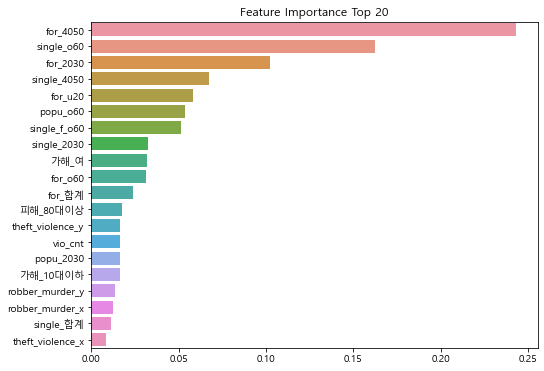

Index(['for_4050', 'single_o60', 'for_2030', 'single_4050', 'for_u20',
       'popu_o60', 'single_f_o60', 'single_2030', '가해_여', 'for_o60', 'for_합계',
       '피해_80대이상', 'theft_violence_y', 'vio_cnt', 'popu_2030', '가해_10대이하',
       'robber_murder_y', 'robber_murder_x', 'single_합계', 'theft_violence_x'],
      dtype='object')


In [133]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q5.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [134]:
mean_absolute_error(y_test_q5, pred5)

2.664975682700552

### 전체 변수 다 넣어주기

In [96]:
df_x = df.drop(['q1','q2','q3','q4','q5'], axis = 1)
df_x

,report_sx_남성,report_sx_불상,report_sx_여성,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,5m_crm_yn,theft_violence_x,robber_murder_x,...,single_2030,single_4050,single_o60,single_f_합계,single_f_u20,single_f_2030,single_f_4050,single_f_o60,adult,bell
0,-0.873690,-0.812504,-1.088919,-0.946182,-1.080025,-0.680192,-0.925678,-0.533681,-0.402208,0.020461,...,-1.007829,-1.645615,-1.541759,-1.408695,-0.305686,-0.971652,-1.708729,-1.550049,-0.593423,-0.593423
1,-1.073739,-1.097357,-1.171360,-1.127285,-1.261404,-0.680192,-1.425254,-0.714168,-0.545798,-0.698583,...,-0.913870,-1.586098,-1.475235,-1.322731,-0.386709,-0.877762,-1.629960,-1.502108,0.299434,0.299434
2,-1.346245,-1.393118,-1.583148,-1.450459,-1.386409,-0.680192,-1.545335,-0.918154,-0.887971,-1.417626,...,-1.007829,-1.645615,-1.541759,-1.408695,-0.305686,-0.971652,-1.708729,-1.550049,-0.593423,-0.593423
3,-0.321555,2.036024,-0.182071,0.065182,-0.589811,-0.680192,-0.581016,-0.037717,-0.090585,-1.417626,...,0.492436,-0.139220,0.116044,0.542183,1.457752,0.708900,0.029251,0.221012,-0.593423,-0.593423
4,-1.155951,-0.917384,-1.274359,-1.178306,-1.240979,-0.680192,-1.395921,-0.739167,-0.845200,0.020461,...,-0.913870,-1.586098,-1.475235,-1.322731,-0.386709,-0.877762,-1.629960,-1.502108,-0.593423,-0.593423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.958533,-0.916965,-0.835575,-0.933879,-0.968910,-0.032891,-0.419685,-1.100141,-1.040727,-0.698583,...,-0.669920,0.142481,-0.186938,-0.617883,-0.901442,-0.845594,0.027122,-0.265578,-0.146995,-0.146995
242,-1.003147,-1.100714,-0.973045,-1.027990,-1.128230,0.938060,-0.768014,-1.486613,-1.688412,-0.339061,...,-0.880908,-0.834410,0.229408,-0.676839,-0.224663,-0.957283,-0.853710,0.260147,0.745862,0.745862
243,-0.679341,-0.833061,-0.732576,-0.731357,-0.760569,1.909011,-0.469185,-1.211133,-1.196538,0.739504,...,-1.049442,-0.704635,-0.018589,-0.857031,-0.939570,-1.074850,-0.799423,-0.072507,-0.146995,-0.146995
244,0.051030,0.036181,0.058191,0.051943,-0.076720,-0.680192,1.052459,-0.733167,-0.509137,-1.417626,...,-0.137324,0.351911,1.559452,0.424776,0.328199,-0.335158,0.406598,1.772423,2.978006,2.978006


In [99]:
X_train_q1_tot = df_x.iloc[:164,:]
X_test_q1_tot = df_x.iloc[164:,:]

X_train_q2_tot = df_x.iloc[:164,:]
X_test_q2_tot = df_x.iloc[164:,:]

X_train_q3_tot = df_x.iloc[:164,:]
X_test_q3_tot = df_x.iloc[164:,:]

X_train_q4_tot = df_x.iloc[:164,:]
X_test_q4_tot = df_x.iloc[164:,:]

X_train_q5_tot = df_x.iloc[:164,:]
X_test_q5_tot = df_x.iloc[164:,:]

### q1 tot

In [135]:
# q1
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q1_tot, y_train_q1)

pred1_tot = xgb_model.predict(X_test_q1_tot)

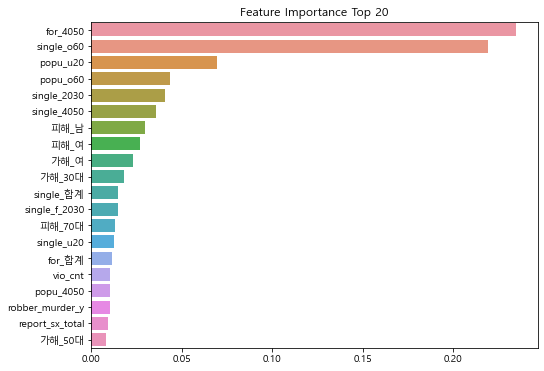

Index(['for_4050', 'single_o60', 'popu_u20', 'popu_o60', 'single_2030',
       'single_4050', '피해_남', '피해_여', '가해_여', '가해_30대', 'single_합계',
       'single_f_2030', '피해_70대', 'single_u20', 'for_합계', 'vio_cnt',
       'popu_4050', 'robber_murder_y', 'report_sx_total', '가해_50대'],
      dtype='object')


In [136]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q1_tot.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [150]:
len(ft_top20.index)

20

In [137]:
mean_absolute_error(y_test_q1, pred1_tot)

2.5348509811773523

### q2_tot

In [138]:
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q2_tot, y_train_q2)

pred2_tot = xgb_model.predict(X_test_q2_tot)

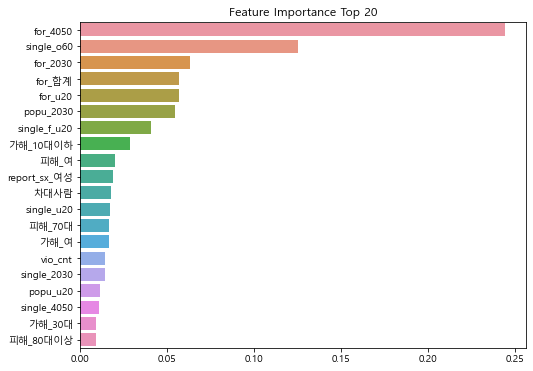

Index(['for_4050', 'single_o60', 'for_2030', 'for_합계', 'for_u20', 'popu_2030',
       'single_f_u20', '가해_10대이하', '피해_여', 'report_sx_여성', '차대사람',
       'single_u20', '피해_70대', '가해_여', 'vio_cnt', 'single_2030', 'popu_u20',
       'single_4050', '가해_30대', '피해_80대이상'],
      dtype='object')


In [139]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q2_tot.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [140]:
mean_absolute_error(y_test_q2, pred2_tot)

2.6589115049780863

### q3 tot

In [141]:
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q3_tot, y_train_q3)

pred3_tot = xgb_model.predict(X_test_q3_tot)

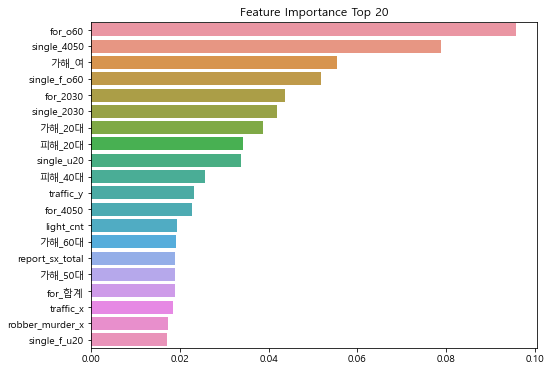

Index(['for_o60', 'single_4050', '가해_여', 'single_f_o60', 'for_2030',
       'single_2030', '가해_20대', '피해_20대', 'single_u20', '피해_40대', 'traffic_y',
       'for_4050', 'light_cnt', '가해_60대', 'report_sx_total', '가해_50대',
       'for_합계', 'traffic_x', 'robber_murder_x', 'single_f_u20'],
      dtype='object')


In [142]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q3_tot.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [143]:
mean_absolute_error(y_test_q3, pred3_tot)

2.7609644633967707

### q4 tot

In [144]:
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q4_tot, y_train_q4)

pred4_tot = xgb_model.predict(X_test_q4_tot)

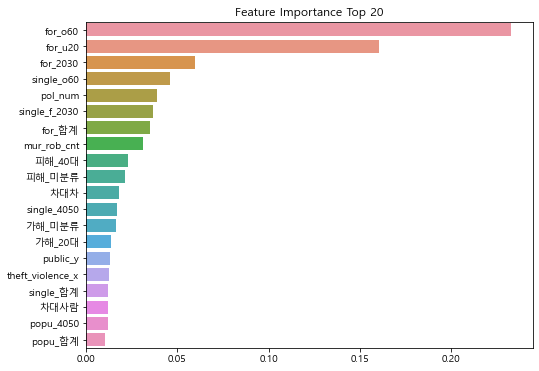

Index(['for_o60', 'for_u20', 'for_2030', 'single_o60', 'pol_num',
       'single_f_2030', 'for_합계', 'mur_rob_cnt', '피해_40대', '피해_미분류', '차대차',
       'single_4050', '가해_미분류', '가해_20대', 'public_y', 'theft_violence_x',
       'single_합계', '차대사람', 'popu_4050', 'popu_합계'],
      dtype='object')


In [145]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q4_tot.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [146]:
mean_absolute_error(y_test_q4, pred4_tot)

3.099852268870284

### q5 tot

In [147]:
a = xgb.XGBRegressor()

xgb_model = a.fit(X_train_q5_tot, y_train_q5)

pred5_tot = xgb_model.predict(X_test_q5_tot)

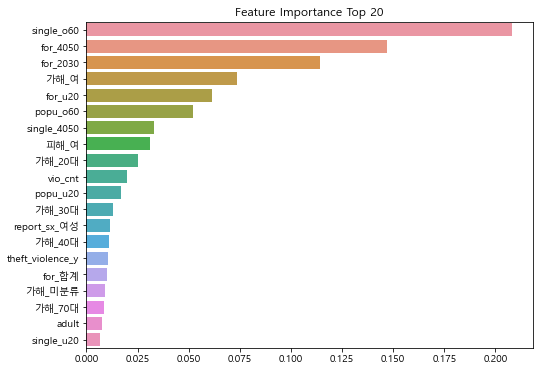

Index(['single_o60', 'for_4050', 'for_2030', '가해_여', 'for_u20', 'popu_o60',
       'single_4050', '피해_여', '가해_20대', 'vio_cnt', 'popu_u20', '가해_30대',
       'report_sx_여성', '가해_40대', 'theft_violence_y', 'for_합계', '가해_미분류',
       '가해_70대', 'adult', 'single_u20'],
      dtype='object')


In [148]:
# 배열형태로 반환
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q5_tot.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [149]:
mean_absolute_error(y_test_q5, pred5_tot)

2.4727394848335074

In [119]:
df.columns

Index(['report_sx_남성', 'report_sx_불상', 'report_sx_여성', 'report_sx_total',
       'vio_cnt', 'mur_rob_cnt', 'car_cnt', '5m_crm_yn', 'theft_violence_x',
       'robber_murder_x', 'traffic_x', 'public_x', 'crm', 'theft_violence_y',
       'robber_murder_y', 'traffic_y', 'public_y', 'light_cnt', '차대사람', '차대차',
       '차량단독', '가해_성별_기타불명', '가해_남', '가해_여', '가해_10대이하', '가해_20대', '가해_30대',
       '가해_40대', '가해_50대', '가해_60대', '가해_70대', '가해_80대이상', '가해_미분류', '피해_남',
       '피해_미분류', '피해_여', '피해_10대이하', '피해_20대', '피해_30대', '피해_40대', '피해_50대',
       '피해_60대', '피해_70대', '피해_80대이상', 'cctv', 'pol_num', 'popu_합계', 'for_합계',
       'popu_u20', 'popu_2030', 'popu_4050', 'popu_o60', 'for_u20', 'for_2030',
       'for_4050', 'for_o60', 'single_합계', 'single_u20', 'single_2030',
       'single_4050', 'single_o60', 'single_f_합계', 'single_f_u20',
       'single_f_2030', 'single_f_4050', 'single_f_o60', 'adult', 'bell', 'q1',
       'q2', 'q3', 'q4', 'q5'],
      dtype='object')